In [ ]:
#data analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\CSOC ig\\housing.csv')

print("Dataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

df.dropna(inplace=True)

plt.figure(figsize=(8, 5))
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

sample_features = ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms']
sns.pairplot(df[sample_features])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

plt.figure(figsize=(10, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

if 'ocean_proximity' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='ocean_proximity', y='median_house_value')
    plt.xticks(rotation=45)
    plt.title("House Value by Ocean Proximity")
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df, alpha=0.5)
plt.title("Income vs. House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(df['housing_median_age'], bins=30, kde=False)
plt.title("Distribution of Housing Median Age")
plt.xlabel("Housing Median Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
#task1

In [44]:
import pandas as pd
import numpy as np
import time
import math
from sklearn.model_selection import train_test_split

start_time = time.time()

df = pd.read_csv('C:\\CSOC ig\\housing.csv')

df.drop(columns=['lat', 'long', 'ocean_proximity'], inplace=True, errors='ignore')
df.dropna(inplace=True)

target = 'median_house_value'
X = df.drop(columns=[target])
y = df[target]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_mean = X_train.mean()
X_std = X_train.std().replace(0, 1)
X_train = (X_train - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train.insert(0, 'Intercept', 1)
X_test.insert(0, 'Intercept', 1)

y_mean = y_train.mean()
y_std = y_train.std() if y_train.std() != 0 else 1
y_train_norm = (y_train - y_mean) / y_std

X_train_vals = X_train.values.tolist()
X_test_vals = X_test.values.tolist()
y_train_vals = y_train_norm.tolist()
y_test_vals = y_test.tolist()

m, n = len(y_train_vals), len(X_train.columns)
theta = [0.0] * n
alpha = 0.01
epochs = 1000

for _ in range(epochs):
    predictions = [sum(theta[j] * X_train_vals[i][j] for j in range(n)) for i in range(m)]
    errors = [predictions[i] - y_train_vals[i] for i in range(m)]

    gradients = [
        sum(errors[i] * X_train_vals[i][j] for i in range(m)) / m
        for j in range(n)
    ]

    for j in range(n):
        theta[j] -= alpha * gradients[j]

def predict(X, theta, y_mean, y_std):
    pred_norm = [sum(theta[j] * x[j] for j in range(len(theta))) for x in X]
    return [p * y_std + y_mean for p in pred_norm]

y_train_pred = predict(X_train_vals, theta, y_mean, y_std)
y_test_pred = predict(X_test_vals, theta, y_mean, y_std)

def evaluate(y_true, y_pred):
    m = len(y_true)
    mae = sum(abs(y_true[i] - y_pred[i]) for i in range(m)) / m
    mse = sum((y_true[i] - y_pred[i]) ** 2 for i in range(m)) / m
    rmse = math.sqrt(mse)
    mean_y = sum(y_true) / m
    ss_tot = sum((y_true[i] - mean_y) ** 2 for i in range(m))
    ss_res = sum((y_true[i] - y_pred[i]) ** 2 for i in range(m))
    r2 = 1 - ss_res / ss_tot
    return mae, mse, rmse, r2

y_train_actual = y_train.tolist()
mae_train, mse_train, rmse_train, r2_train = evaluate(y_train_actual, y_train_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate(y_test_vals, y_test_pred)

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTraining Set Performance:")
print(f"MAE  : {mae_train:.2f}")
print(f"MSE  : {mse_train:.2f}")
print(f"RMSE : {rmse_train:.2f}")
print(f"R²   : {r2_train:.4f}")

print("\nTest Set Performance:")
print(f"MAE  : {mae_test:.2f}")
print(f"MSE  : {mse_test:.2f}")
print(f"RMSE : {rmse_test:.2f}")
print(f"R²   : {r2_test:.4f}")

print(f"\nElapsed Time: {elapsed_time:.2f} seconds")




Training Set Performance:
MAE  : 52285.18
MSE  : 5110880572.12
RMSE : 71490.42
R²   : 0.6139

Test Set Performance:
MAE  : 53192.05
MSE  : 5262876841.39
RMSE : 72545.69
R²   : 0.6152

Elapsed Time: 34.47 seconds


In [ ]:
#task2

In [47]:
import pandas as pd
import numpy as np
import time
import math
from sklearn.model_selection import train_test_split

start_time = time.time()

file_path = 'C:\\CSOC ig\\housing.csv'
df = pd.read_csv(file_path)

columns_to_drop = ['lat', 'long', 'ocean_proximity']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

if df.isnull().values.any():
    df = df.dropna()

target_column = 'median_house_value'
X = df.drop(target_column, axis=1)
y = df[target_column]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

means = X_train.mean()
stds = X_train.std().replace(0, 1)
X_train = (X_train - means) / stds
X_test = (X_test - means) / stds

X_train.insert(0, 'Intercept', 1)
X_test.insert(0, 'Intercept', 1)

X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

y_mean = y_train_np.mean()
y_std = y_train_np.std() if y_train_np.std() != 0 else 1
y_train_norm = (y_train_np - y_mean) / y_std

m, n_features = X_train_np.shape
theta = np.zeros(n_features)
alpha = 0.01
epochs = 1000

for epoch in range(epochs):
    predictions = X_train_np @ theta
    errors = predictions - y_train_norm
    gradients = (X_train_np.T @ errors) / m
    theta -= alpha * gradients

y_train_pred_norm = X_train_np @ theta
y_train_pred = y_train_pred_norm * y_std + y_mean

y_test_pred_norm = X_test_np @ theta
y_test_pred = y_test_pred_norm * y_std + y_mean

def evaluate_metrics(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    r2 = 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)
    return mae, rmse, r2

mae_train, rmse_train, r2_train = evaluate_metrics(y_train_np, y_train_pred)
mae_test, rmse_test, r2_test = evaluate_metrics(y_test_np, y_test_pred)

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTraining Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared: {r2_train:.4f}")

print("\nTest Set Metrics:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared: {r2_test:.4f}")

print(f"\nTraining Time: {elapsed_time:.2f} seconds")


Training Set Metrics:
Mean Absolute Error (MAE): 52285.18
Root Mean Squared Error (RMSE): 71490.42
R-squared: 0.6139

Test Set Metrics:
Mean Absolute Error (MAE): 53192.05
Root Mean Squared Error (RMSE): 72545.69
R-squared: 0.6152

Training Time: 0.14 seconds


In [ ]:
#task3

In [48]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

start_time = time.time()


df = pd.read_csv('C:\\CSOC ig\\housing.csv')

df.drop(columns=['lat', 'long', 'ocean_proximity'], inplace=True, errors='ignore')

df.dropna(inplace=True)

target = 'median_house_value'
X = df.drop(columns=[target])
y = df[target]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
fit_start_time = time.time()
model.fit(X_train_scaled, y_train)
fit_end_time = time.time()
fit_duration = fit_end_time - fit_start_time

y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate(y_train, y_train_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate(y_test, y_test_pred)

total_time = time.time() - start_time

# Output
print("\nTraining Set Metrics:")
print(f"MAE  : {mae_train:.2f}")
print(f"MSE  : {mse_train:.2f}")
print(f"RMSE : {rmse_train:.2f}")
print(f"R²   : {r2_train:.4f}")

print("\nTest Set Metrics:")
print(f"MAE  : {mae_test:.2f}")
print(f"MSE  : {mse_test:.2f}")
print(f"RMSE : {rmse_test:.2f}")
print(f"R²   : {r2_test:.4f}")

print(f"\nModel Fitting Time: {fit_duration:.4f} seconds")
print(f"Total Elapsed Time: {total_time:.2f} seconds")



Training Set Metrics:
MAE  : 50629.50
MSE  : 4817977906.77
RMSE : 69411.66
R²   : 0.6360

Test Set Metrics:
MAE  : 51372.67
MSE  : 4921881237.63
RMSE : 70156.12
R²   : 0.6401

Model Fitting Time: 0.0000 seconds
Total Elapsed Time: 0.05 seconds


In [ ]:
#plot for different matrics

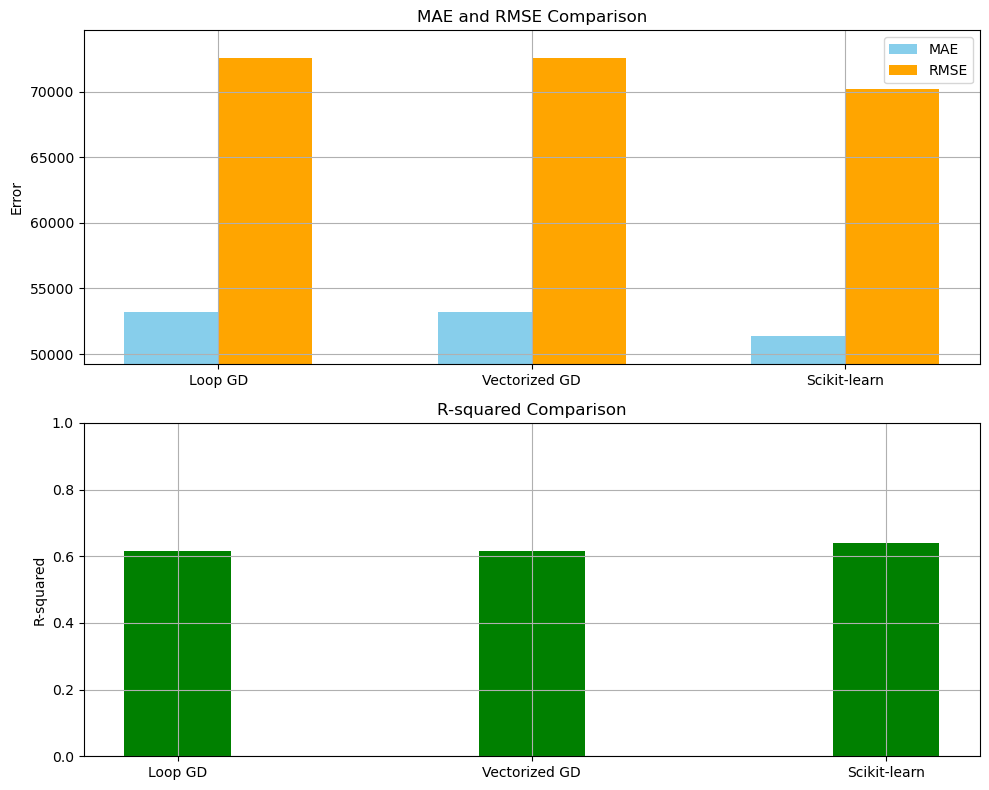

In [51]:

# Metrics from loop-based
mae_loop = 53192.05
rmse_loop = 72545.69
r2_loop = 0.6152

# Metrics from vectorized GD
mae_vec = 53192.05
rmse_vec = 72545.69
r2_vec = 0.6152

# Metrics from sklearn model
mae_skl =  51372.67
rmse_skl = 70156.12
r2_skl =  0.6401

import matplotlib.pyplot as plt
import numpy as np

methods = ['Loop GD', 'Vectorized GD', 'Scikit-learn']

mae_scores = np.array([53192.05, 53192.05, 51372.67])
rmse_scores = np.array([72545.69, 72545.69, 70156.12])
r2_scores = np.array([0.6152, 0.6152, 0.6401])

x = np.arange(len(methods))
width = 0.3

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

ax1.bar(x - width/2, mae_scores, width, label='MAE', color='skyblue')
ax1.bar(x + width/2, rmse_scores, width, label='RMSE', color='orange')
ax1.set_xticks(x)
ax1.set_xticklabels(methods)
ax1.set_ylabel('Error')
ax1.set_title('MAE and RMSE Comparison')

min_val = min(mae_scores.min(), rmse_scores.min())
max_val = max(mae_scores.max(), rmse_scores.max())
margin = (max_val - min_val) * 0.1
ax1.set_ylim(min_val - margin, max_val + margin)

ax1.legend()
ax1.grid(True)

ax2.bar(x, r2_scores, width, color='green')
ax2.set_xticks(x)
ax2.set_xticklabels(methods)
ax2.set_ylabel('R-squared')
ax2.set_ylim(0, 1)
ax2.set_title('R-squared Comparison')
ax2.grid(True)

plt.tight_layout()
plt.show()

